In [2]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("Mall_Customers.csv")
print(df.head())


Saving Mall_Customers.csv to Mall_Customers.csv
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


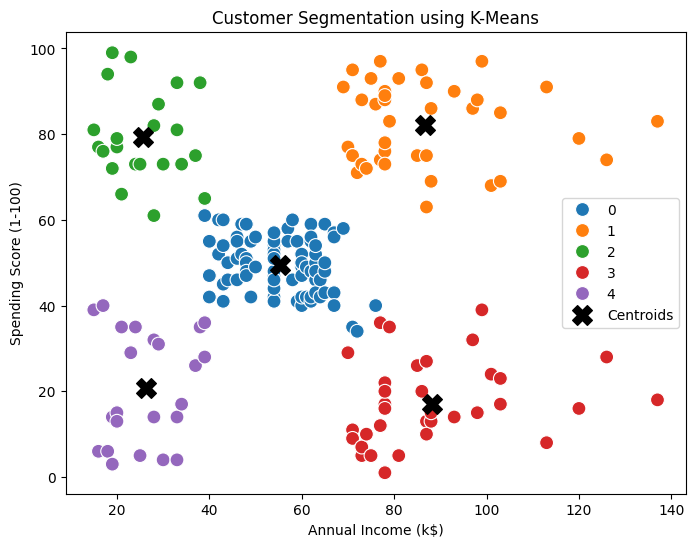

Number of customers in each cluster:
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Mall_Customers.csv")

#features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# isualization
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,
                x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='Cluster',
                palette='tab10',
                s=100)

plt.scatter(kmeans.cluster_centers_[:,0]*X['Annual Income (k$)'].std() + X['Annual Income (k$)'].mean(),
            kmeans.cluster_centers_[:,1]*X['Spending Score (1-100)'].std() + X['Spending Score (1-100)'].mean(),
            c='black', s=200, marker='X', label='Centroids')

plt.title("Customer Segmentation using K-Means")
plt.legend()
plt.show()

print("Number of customers in each cluster:")
print(df['Cluster'].value_counts())

Dataset Shape: (200, 5)
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

--- Null Val

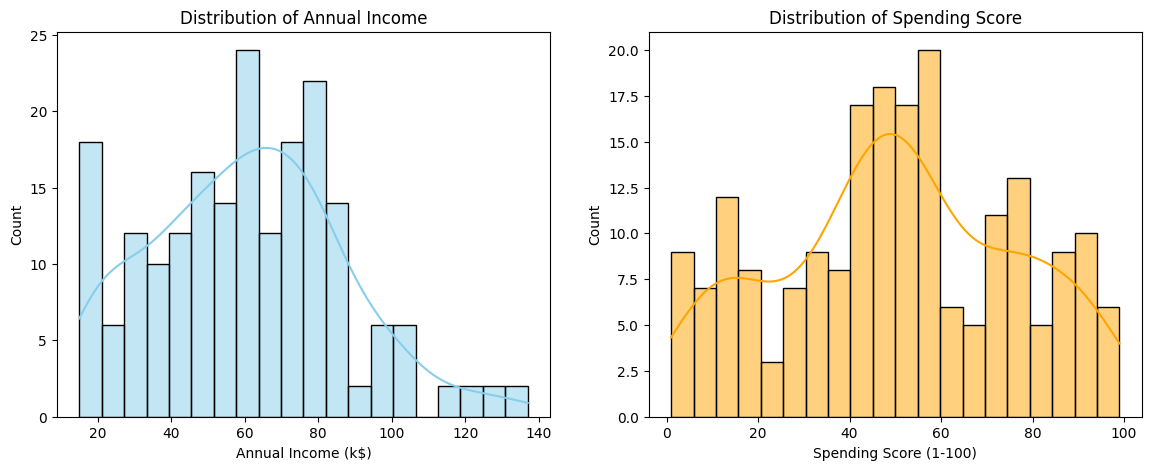

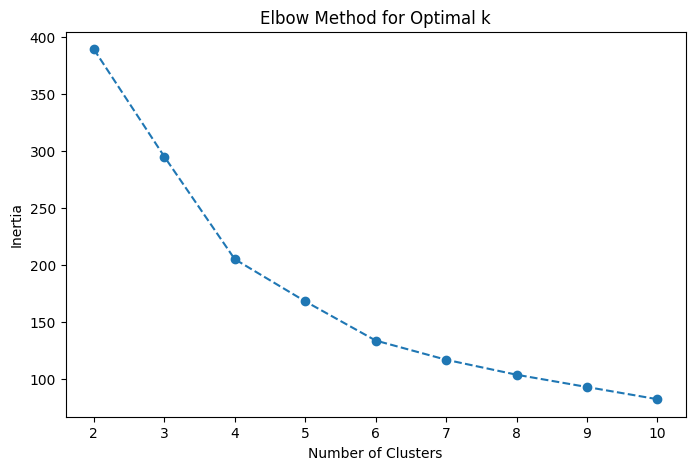

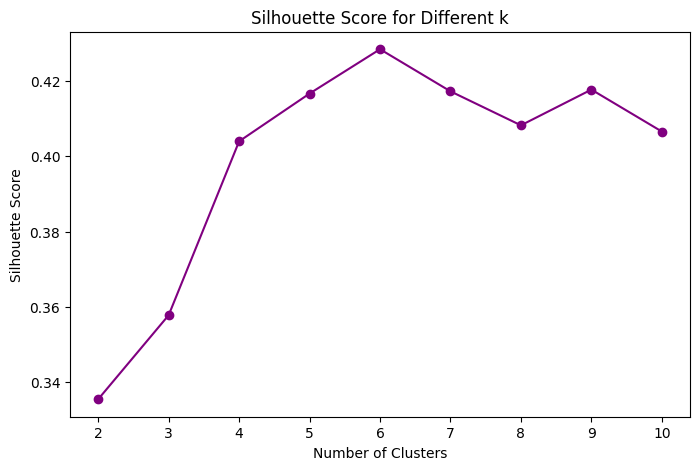

✅ Optimal number of clusters (by silhouette): 6


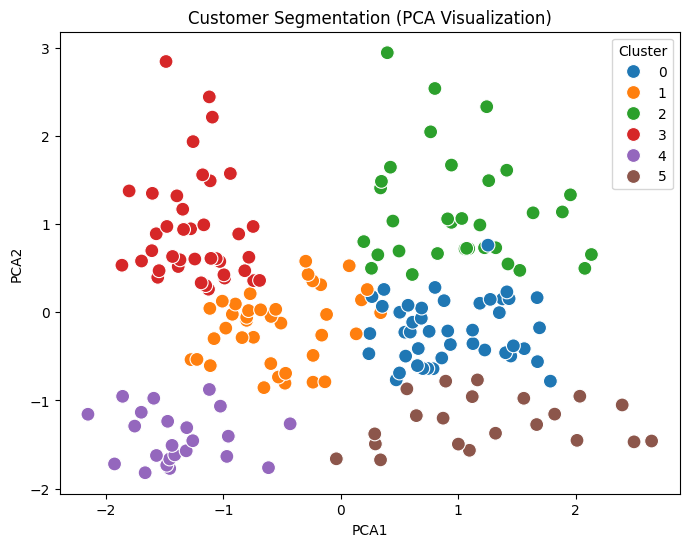


--- Cluster Profiling ---
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        56.333333           54.266667               49.066667
1        26.794872           57.102564               48.128205
2        41.939394           88.939394               16.969697
3        32.692308           86.538462               82.128205
4        25.000000           25.260870               77.608696
5        45.523810           26.285714               19.380952


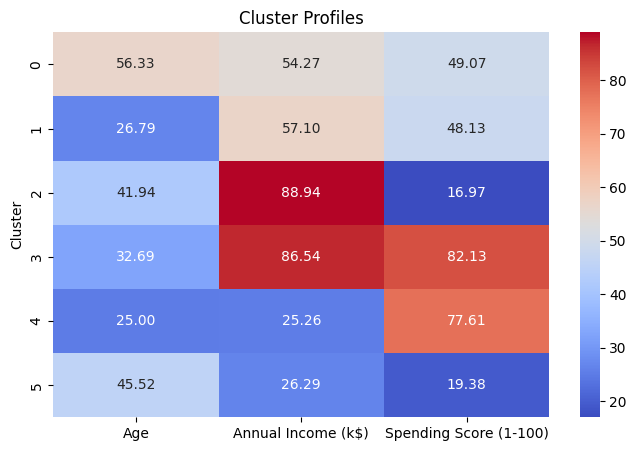

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

df = pd.read_csv("Mall_Customers.csv")

print("Dataset Shape:", df.shape)
print(df.head())

#EDA
print("\n--- Info ---")
print(df.info())
print("\n--- Null Values ---")
print(df.isnull().sum())

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20, color="skyblue")
plt.title("Distribution of Annual Income")

plt.subplot(1,2,2)
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20, color="orange")
plt.title("Distribution of Spending Score")
plt.show()

features = df[['Age','Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

inertia = []
K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'o--')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

sil_scores = {}
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores[k] = silhouette_score(X_scaled, labels)

plt.figure(figsize=(8,5))
plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker='o', color='purple')
plt.title("Silhouette Score for Different k")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

best_k = max(sil_scores, key=sil_scores.get)
print(f"✅ Optimal number of clusters (by silhouette): {best_k}")

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)
df['PCA1'] = pca_data[:,0]
df['PCA2'] = pca_data[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="tab10", s=100)
plt.title("Customer Segmentation (PCA Visualization)")
plt.legend(title="Cluster")
plt.show()

cluster_profile = df.groupby("Cluster")[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()
print("\n--- Cluster Profiling ---")
print(cluster_profile)

plt.figure(figsize=(8,5))
sns.heatmap(cluster_profile, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cluster Profiles")
plt.show()
